<a href="https://colab.research.google.com/github/oluwamark/compx310/blob/main/Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1Gx5DxZwKkR3zFQN0yfFCOZf-qCA0aVG1?usp=sharing

In [ ]:
SEED = 1631625

def ground_truth_concept(x):
    y=0.25*x**3+0.5*np.sin(np.pi*2*x)
    return y

def data_generator(n_examples,seed=314159265):
  np.random.seed(seed)
  x=(np.random.rand(n_examples)-0.5)*4
  np.random.seed(seed+1)
  y=ground_truth_concept(x)+np.random.randn(n_examples)*0.25
  x=x.reshape(n_examples,1)
  return x,y

Pretask

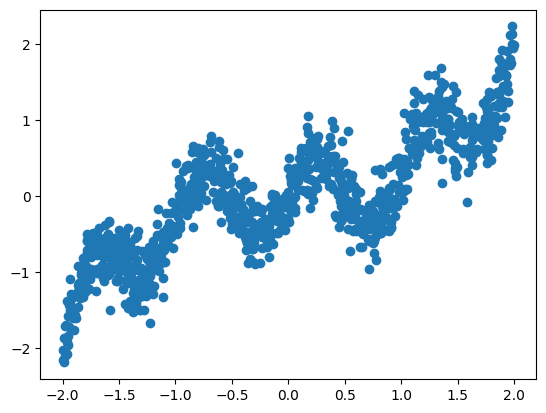

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x,y=data_generator(1000,seed=SEED)
plt.scatter(x,y)
plt.show()

###Part A

Part 4

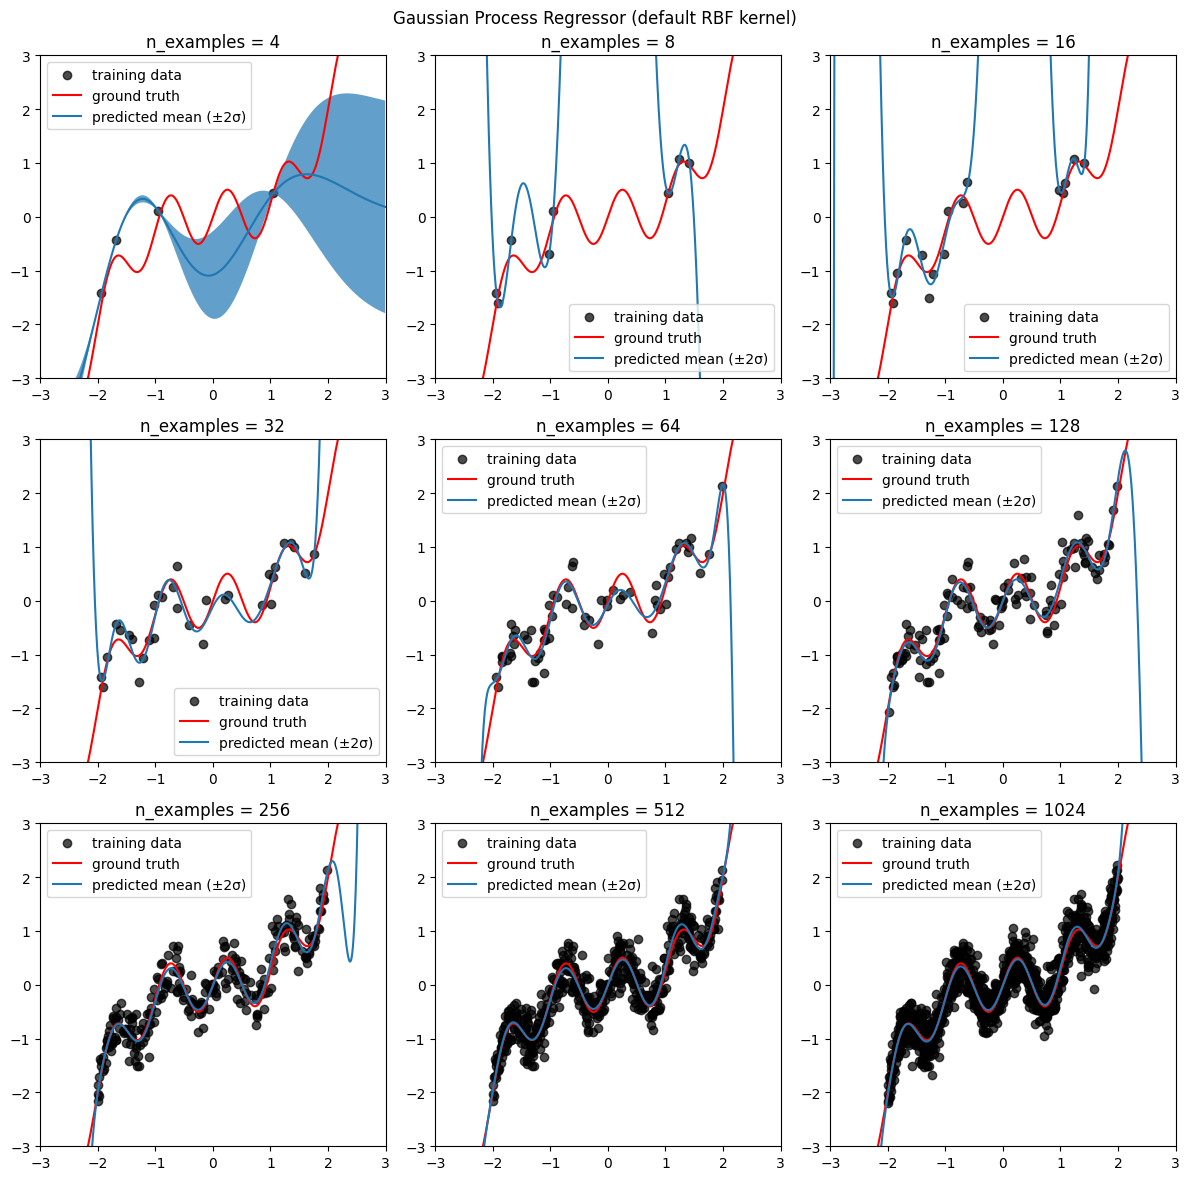

In [ ]:
# https://saturncloud.io/blog/how-to-change-subplot-size-in-python-matplotlib-a-guide/
# https://www.geeksforgeeks.org/python/how-to-create-subplots-in-matplotlib-with-python/
# https://www.geeksforgeeks.org/machine-learning/gaussian-process-regression-gpr/
# https://stackoverflow.com/questions/30261054/how-to-set-axes-limits-in-each-subplot
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_alpha.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html

import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor

# examples
n_examples = [4,8,16,32,64,128,256,512,1024]

# Creating subplots
fig, ax = plt.subplots(3, 3, figsize=(12,12))
i = 0;

for row in range(3):
  for col in range(3):
    data_X,data_y = data_generator(n_examples[i], SEED)

    # create regressor
    gp = GaussianProcessRegressor()

    # fit to data
    gp.fit(data_X,data_y)

    # generate range of x values and use to produce mean predictions
    xg = [x/100 for x in range(-300,300,1)]
    xg = np.array(xg)
    xg = xg.reshape(-1, 1)
    yg = [ground_truth_concept(x) for x in xg]

    # generate mean prediction values
    y_mean, std = gp.predict(xg, return_std=True)

    # create plot
    ax[row,col].scatter(data_X, data_y, c='k', label='training data',alpha=0.7)
    ax[row,col].plot(xg, yg, c='r', label='ground truth')
    ax[row,col].plot(xg, y_mean, label='predicted mean (±2σ)')
    ax[row,col].fill_between(xg.flatten(), np.add(y_mean,-2*std), np.add(y_mean,2*std), alpha=0.7)
    ax[row,col].title.set_text(f"n_examples = {n_examples[i]}")

    i += 1

# Adding legends and showing the figure
plt.suptitle("Gaussian Process Regressor (default RBF kernel)")
for axes in ax.flat:
    axes.legend()
    axes.set_xlim(-3, 3)
    axes.set_ylim(-3, 3)
plt.tight_layout()
plt.show()

Part 5

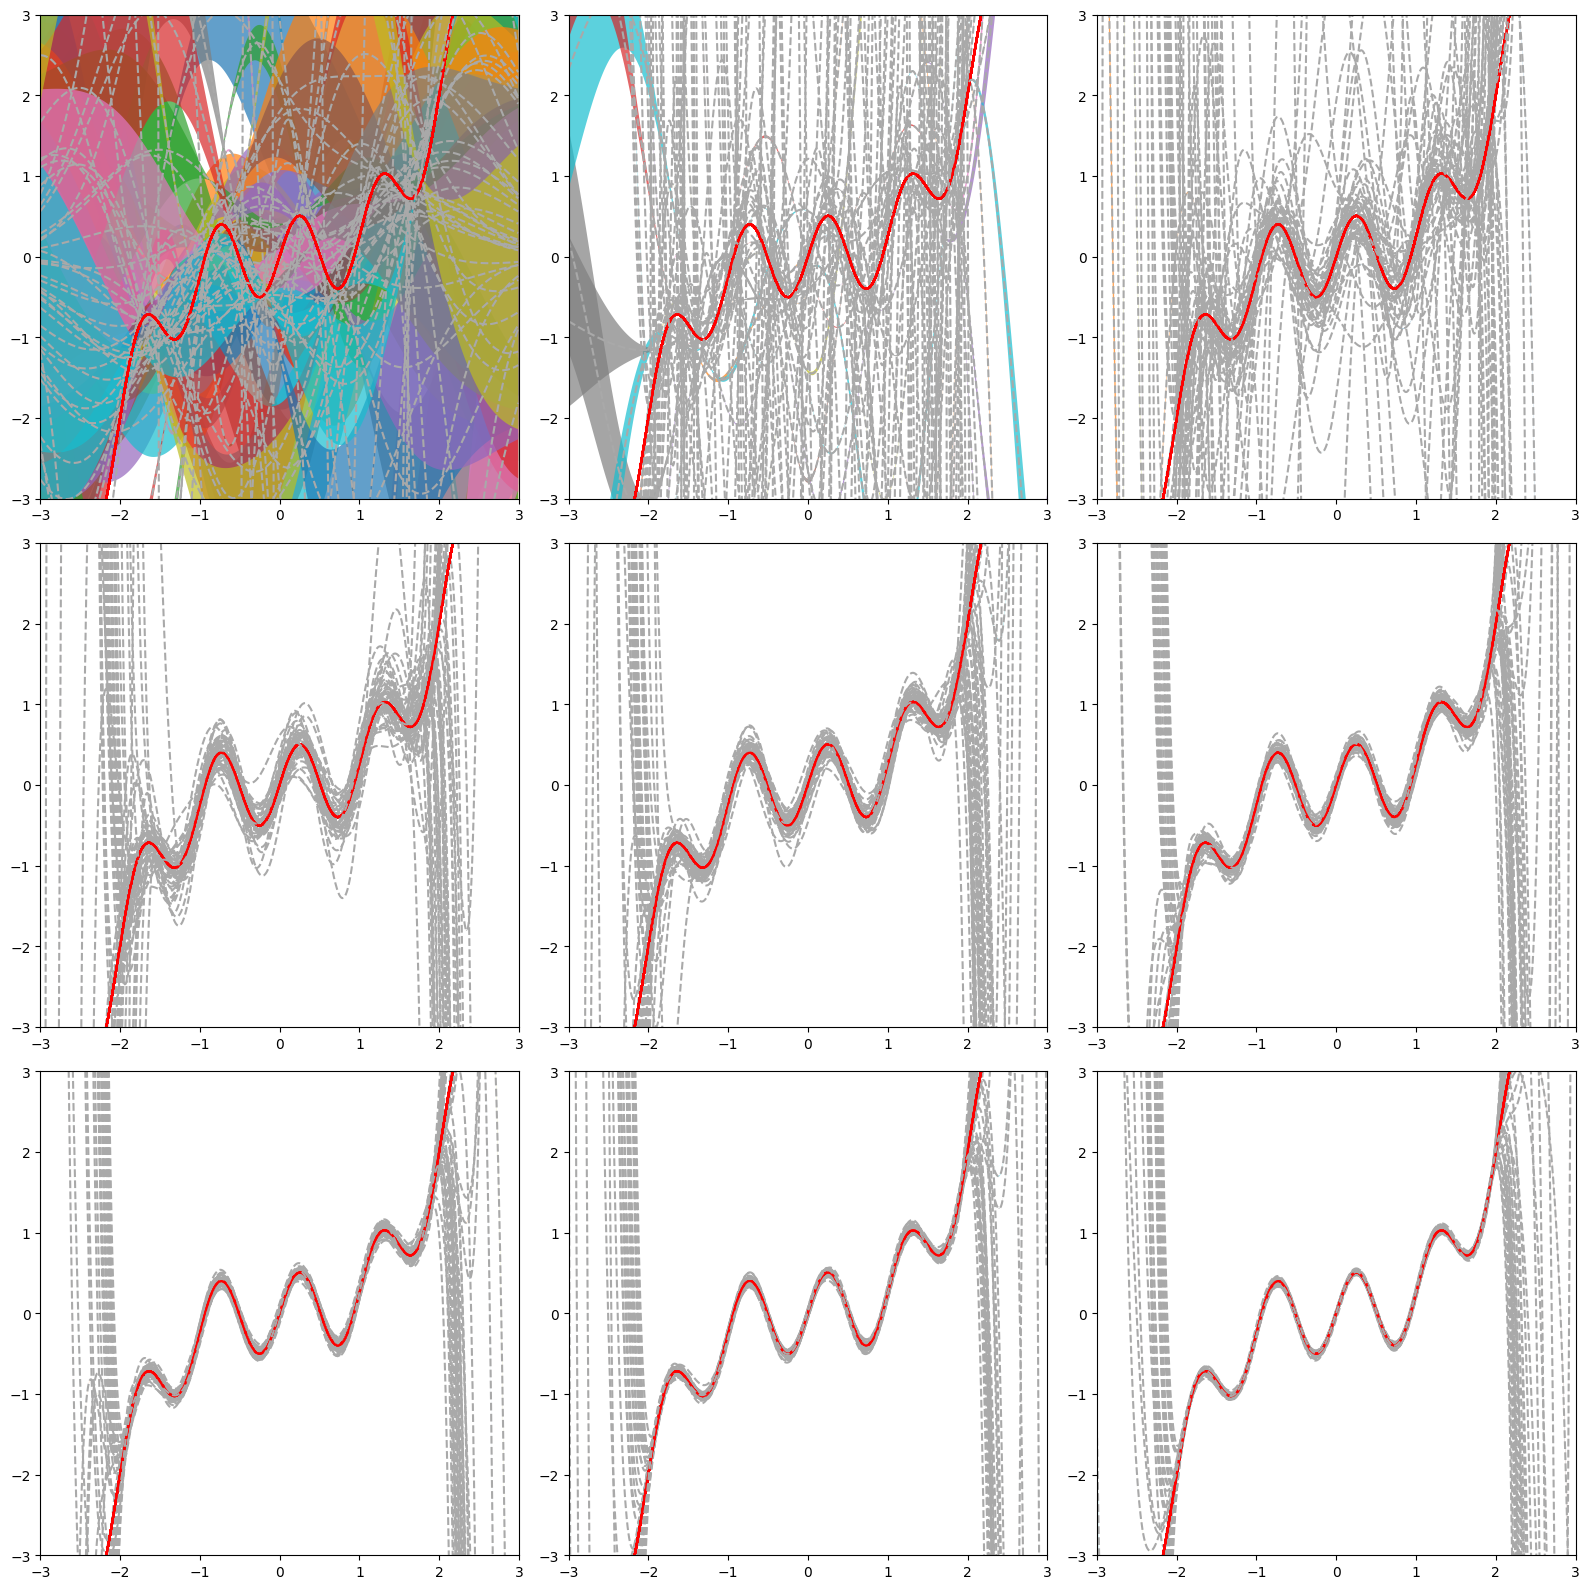

In [ ]:
# https://saturncloud.io/blog/how-to-change-subplot-size-in-python-matplotlib-a-guide/
# https://www.geeksforgeeks.org/python/how-to-create-subplots-in-matplotlib-with-python/
# https://www.geeksforgeeks.org/machine-learning/gaussian-process-regression-gpr/
# https://stackoverflow.com/questions/30261054/how-to-set-axes-limits-in-each-subplot
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_alpha.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html
# https://stackoverflow.com/questions/25239933/how-to-add-a-title-to-each-subplot

import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor

# examples
n_examples = [4,8,16,32,64,128,256,512,1024]

# Creating subplots
fig, ax = plt.subplots(3, 3, figsize=(16,16))
i = 0;

for row in range(3):
  for col in range(3):
    for j in range(50):
      data_X,data_y = data_generator(n_examples[i], SEED+j)

      # create regressor
      gp = GaussianProcessRegressor()

      # fit to data
      gp.fit(data_X,data_y)

      # generate range of x values and use to produce mean predictions
      xg = [x/100 for x in range(-300,300,1)]
      xg = np.array(xg)
      xg = xg.reshape(-1, 1)
      yg = [ground_truth_concept(x) for x in xg]

      # generate mean prediction values
      y_mean, std = gp.predict(xg, return_std=True)

      # create plot
      #ax[row,col].scatter(data_X, data_y, c='k', label='training data')
      ax[row,col].plot(xg, yg, c='r', label='ground truth')
      ax[row,col].plot(xg, y_mean, c='darkgrey', label='predicted mean',linestyle="dashed")
      ax[row,col].fill_between(xg.flatten(), np.add(y_mean,-2*std), np.add(y_mean,2*std), alpha=0.7)

      j += 1
    i += 1

# Adding legends and showing the figure
for axes in ax.flat:
    #axes.legend()
    axes.set_xlim(-3, 3)
    axes.set_ylim(-3, 3)
plt.tight_layout()
plt.show()

###Part B

In [ ]:
# creating helper funciton
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RBF

def create_subplot(kernel):
  # examples
  n_examples = [4,8,16,32,64,128,256,512,1024]

  # Creating subplots
  fig, ax = plt.subplots(3, 3, figsize=(12,12))

  i = 0;

  for row in range(3):
    for col in range(3):
      data_X,data_y = data_generator(n_examples[i], SEED)

      # create regressor
      gp = GaussianProcessRegressor(kernel=kernel)

      # fit to data
      gp.fit(data_X,data_y)

      # generate range of x values and use to produce mean predictions
      xg = [x/100 for x in range(-300,300,1)]
      xg = np.array(xg)
      xg = xg.reshape(-1, 1)
      yg = [ground_truth_concept(x) for x in xg]

      # generate mean prediction values
      y_mean, std = gp.predict(xg, return_std=True)

      # create plot
      #ax[row,col].scatter(data_X, data_y, c='k', label='training data')
      ax[row,col].plot(xg, yg, c='r', label='ground truth')
      ax[row,col].plot(xg, y_mean, label='predicted mean')
      ax[row,col].fill_between(xg.flatten(), np.add(y_mean,-std), np.add(y_mean,std), alpha=0.7)
      ax[row,col].title.set_text(f"n_examples = {n_examples[i]}")

      i += 1

  # Adding legends and showing the figure
  plt.suptitle(f"Gaussian Process Regressor {gp.kernel_}")
  for axes in ax.flat:
      axes.legend()
      axes.set_xlim(-3, 3)
      axes.set_ylim(-3, 3)
  plt.tight_layout()
  plt.show()

In [ ]:
from sklearn.gaussian_process.kernels import RationalQuadratic, DotProduct, Exponentiation,RBF, Matern, WhiteKernel, ExpSineSquared, ConstantKernel

kernels = []

#A polynomial kernel of degree 2, with a White Noise kernel with sigma 0.01
kernels.append(Exponentiation(DotProduct()+ConstantKernel(),2) + WhiteKernel(noise_level=0.01))
#A polynomial kernel of degree 3, with a White Noise kernel with sigma 0.01
kernels.append(Exponentiation(DotProduct()+ConstantKernel(),3) + WhiteKernel(noise_level=0.01))
#A Matern kernel, with a White Noise kernel with sigma 0.01
kernels.append(Matern() + WhiteKernel(noise_level=0.01))
#A RBF kernel, with a White Noise kernel with sigma 0.01
kernels.append(RBF() + WhiteKernel(noise_level=0.01))
#A polynomial kernel of degree 2 with an RBF kernel, and a White Noise kernel with sigma 0.01
kernels.append(Exponentiation(DotProduct()+ConstantKernel(),2) + RBF() + WhiteKernel(noise_level=0.01))
#A polynomial kernel of degree 2, with a White Noise kernel with sigma 1
kernels.append(Exponentiation(DotProduct()+ConstantKernel(),2) + WhiteKernel(noise_level=1))
#A polynomial kernel of degree 3, with a White Noise kernel with sigma 1
kernels.append(Exponentiation(DotProduct()+ConstantKernel(),3) + WhiteKernel(noise_level=1))
#A Matern kernel, with a White Noise kernel with sigma 1
kernels.append(Matern() +  WhiteKernel(noise_level=1))
#A RBF kernel, with a White Noise kernel with sigma 1
kernels.append(RBF() + WhiteKernel(noise_level=1))
#A polynomial kernel of degree 3 with an RBF kernel, and a White Noise kernel with sigma 1
kernels.append(Exponentiation(DotProduct()+ConstantKernel(),3) + RBF() + WhiteKernel(noise_level=1))

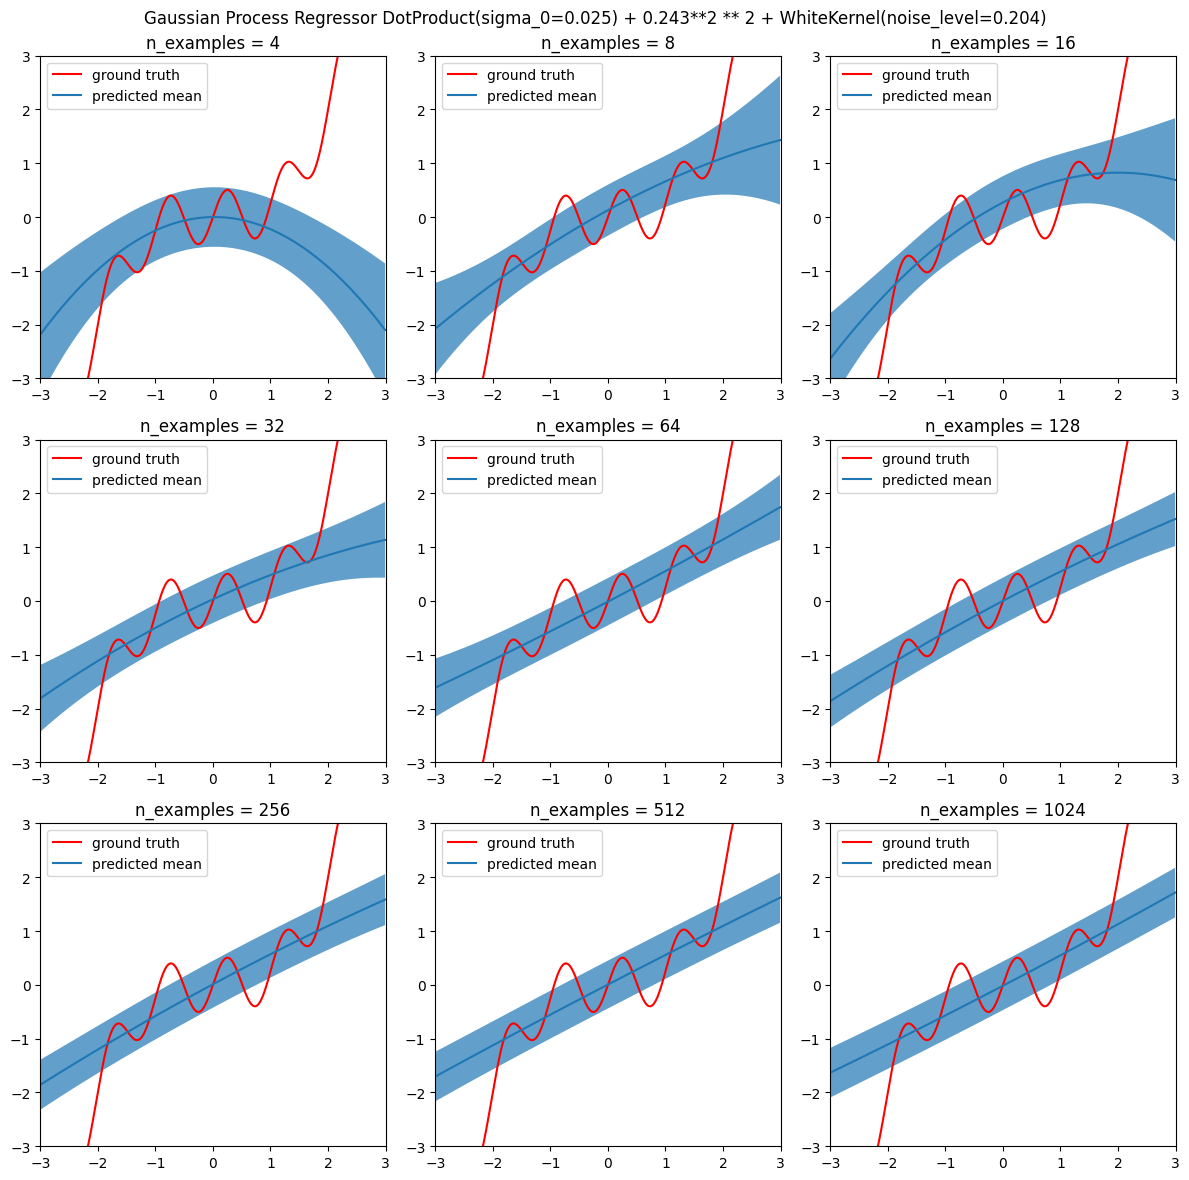

/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__kernel__k1__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__kernel__k2__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


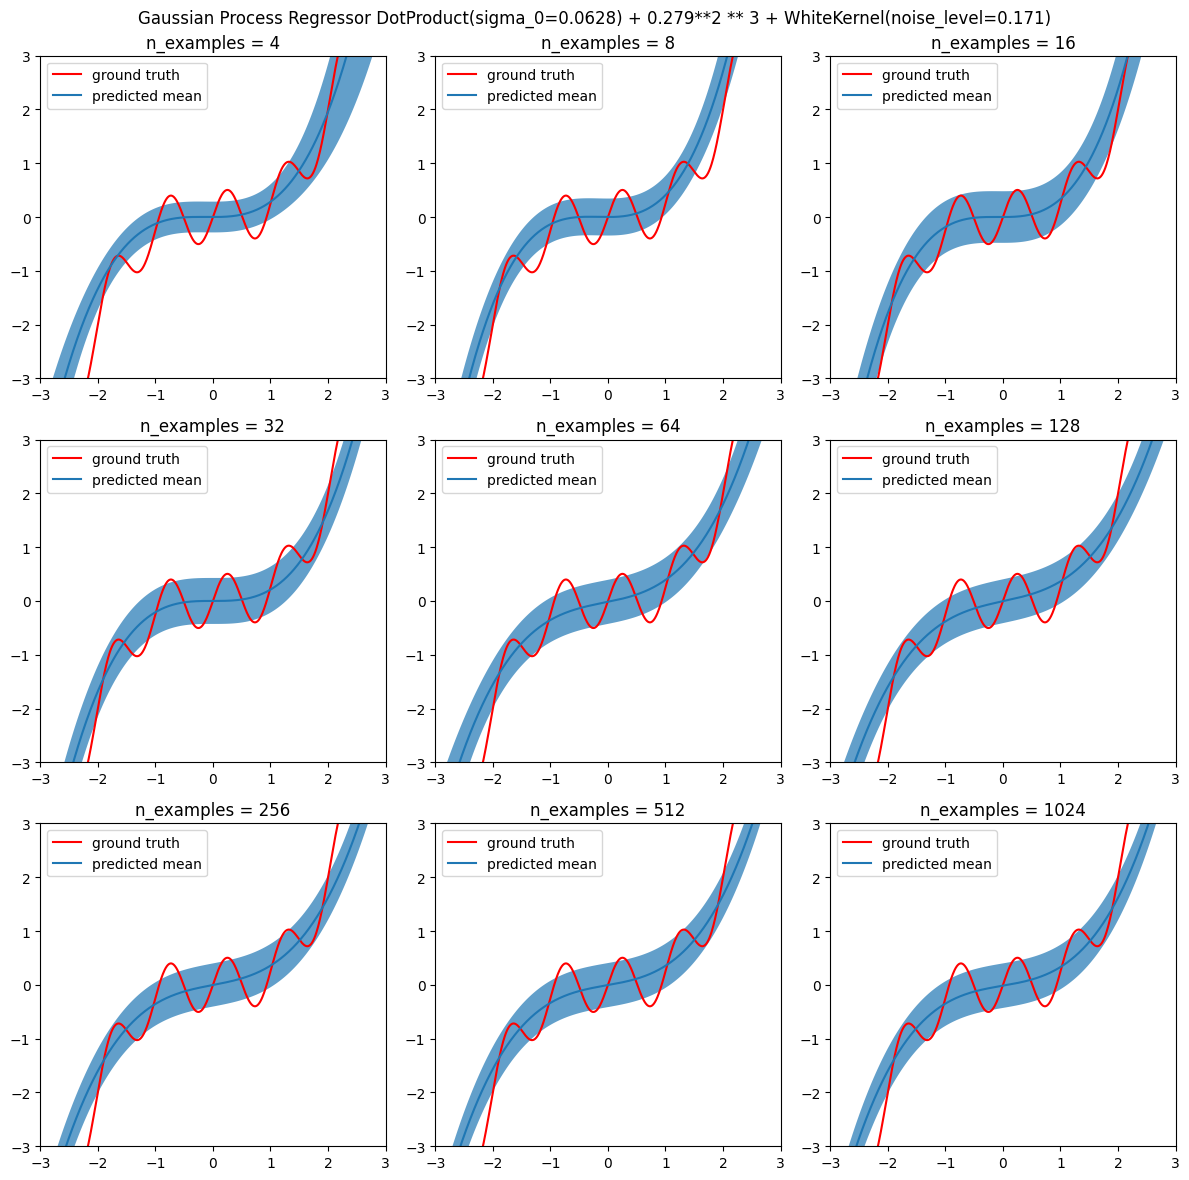

/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


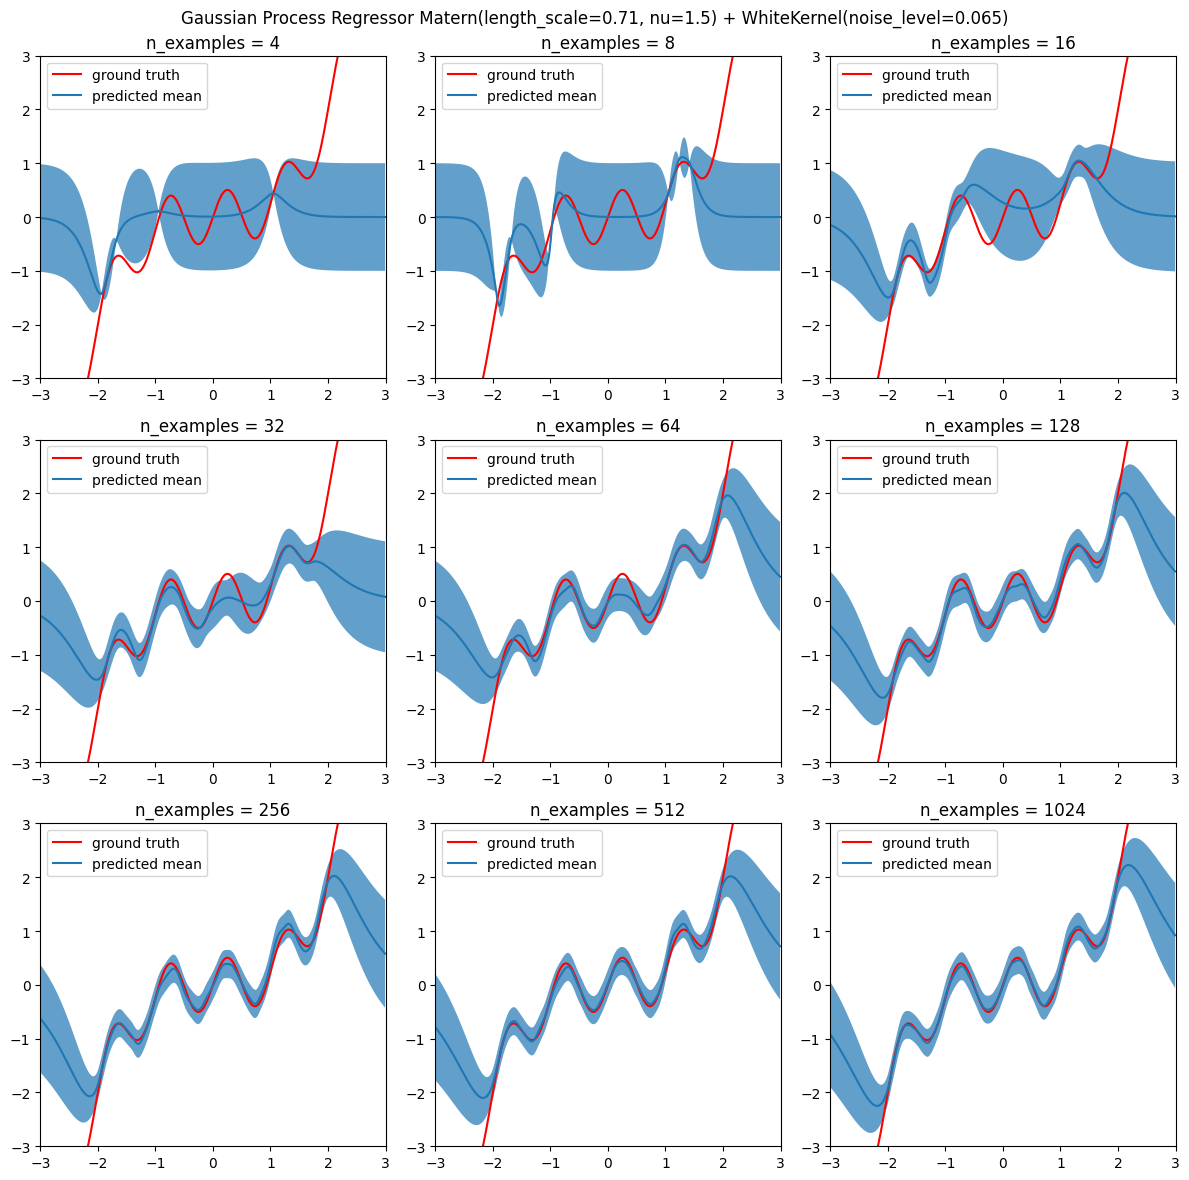

/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


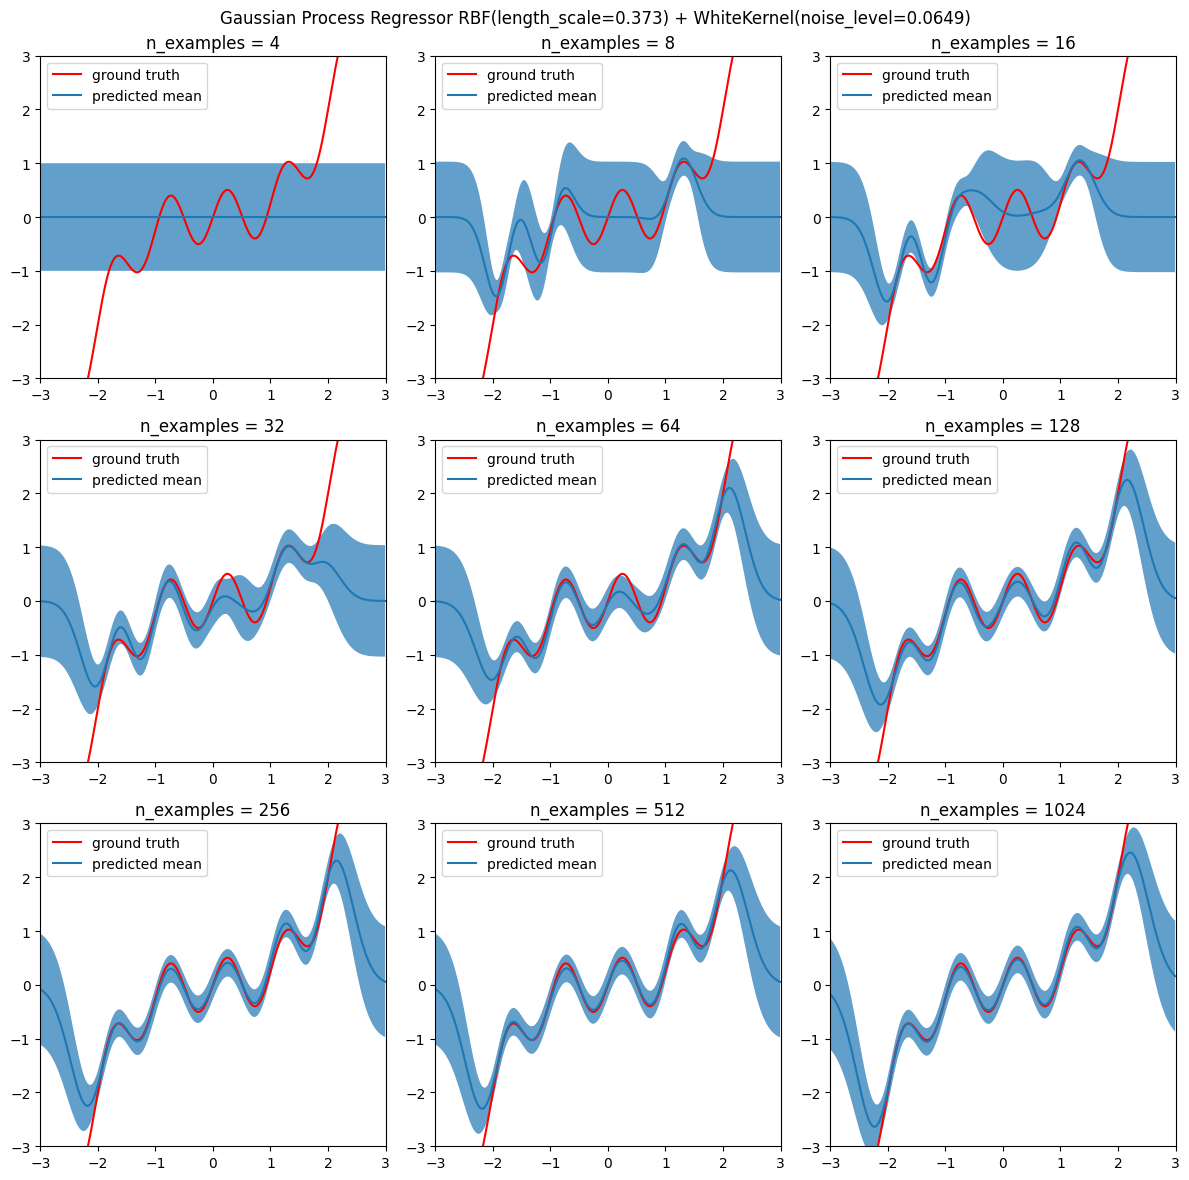

/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__kernel__k2__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


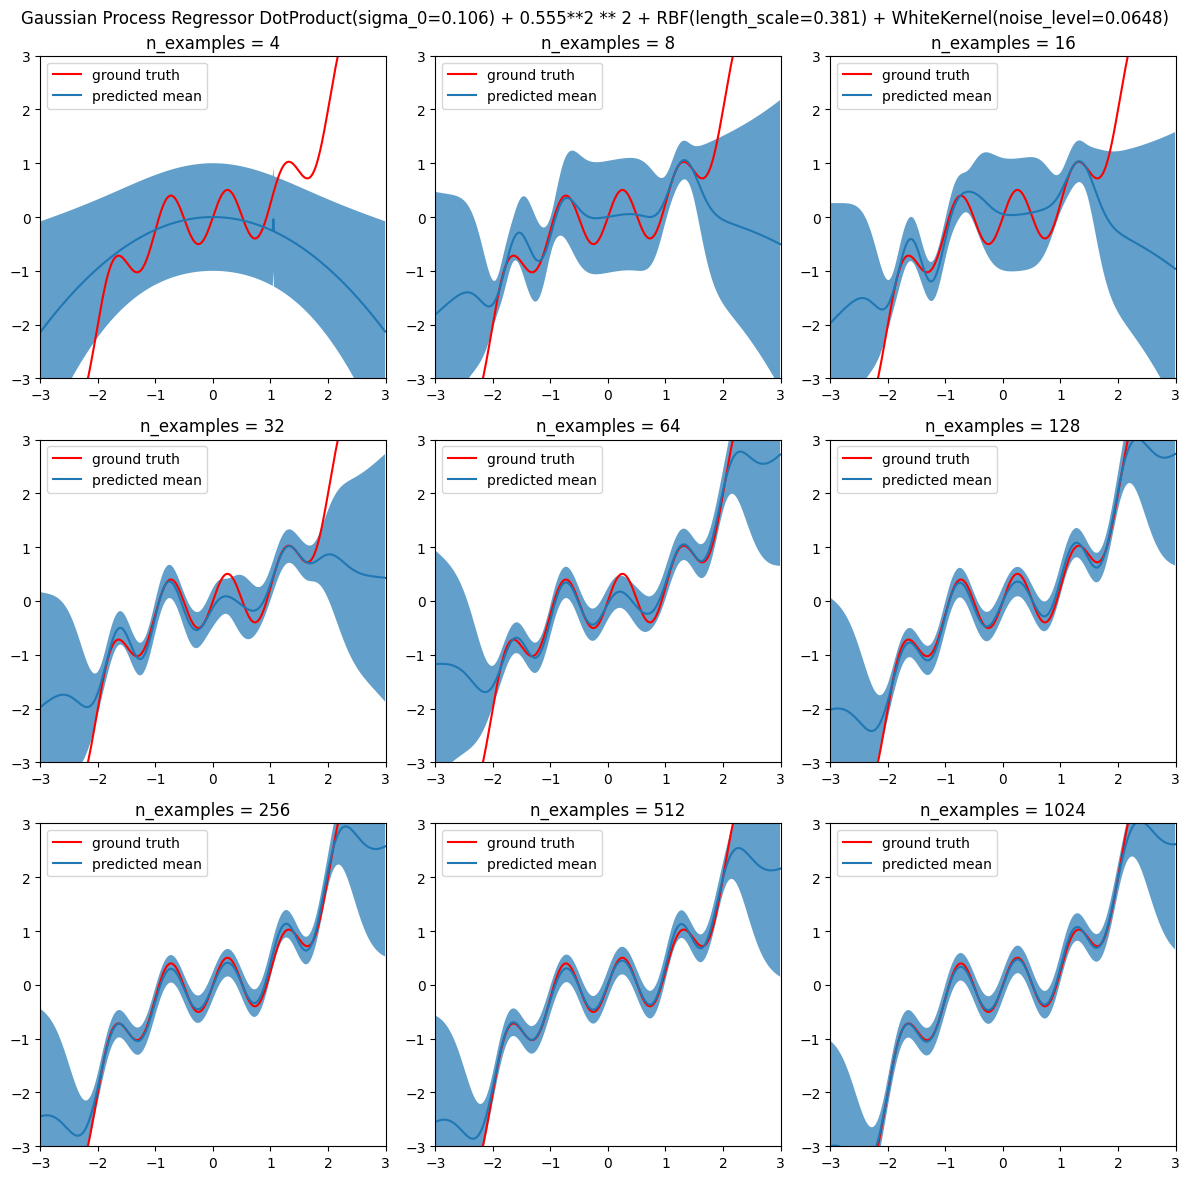

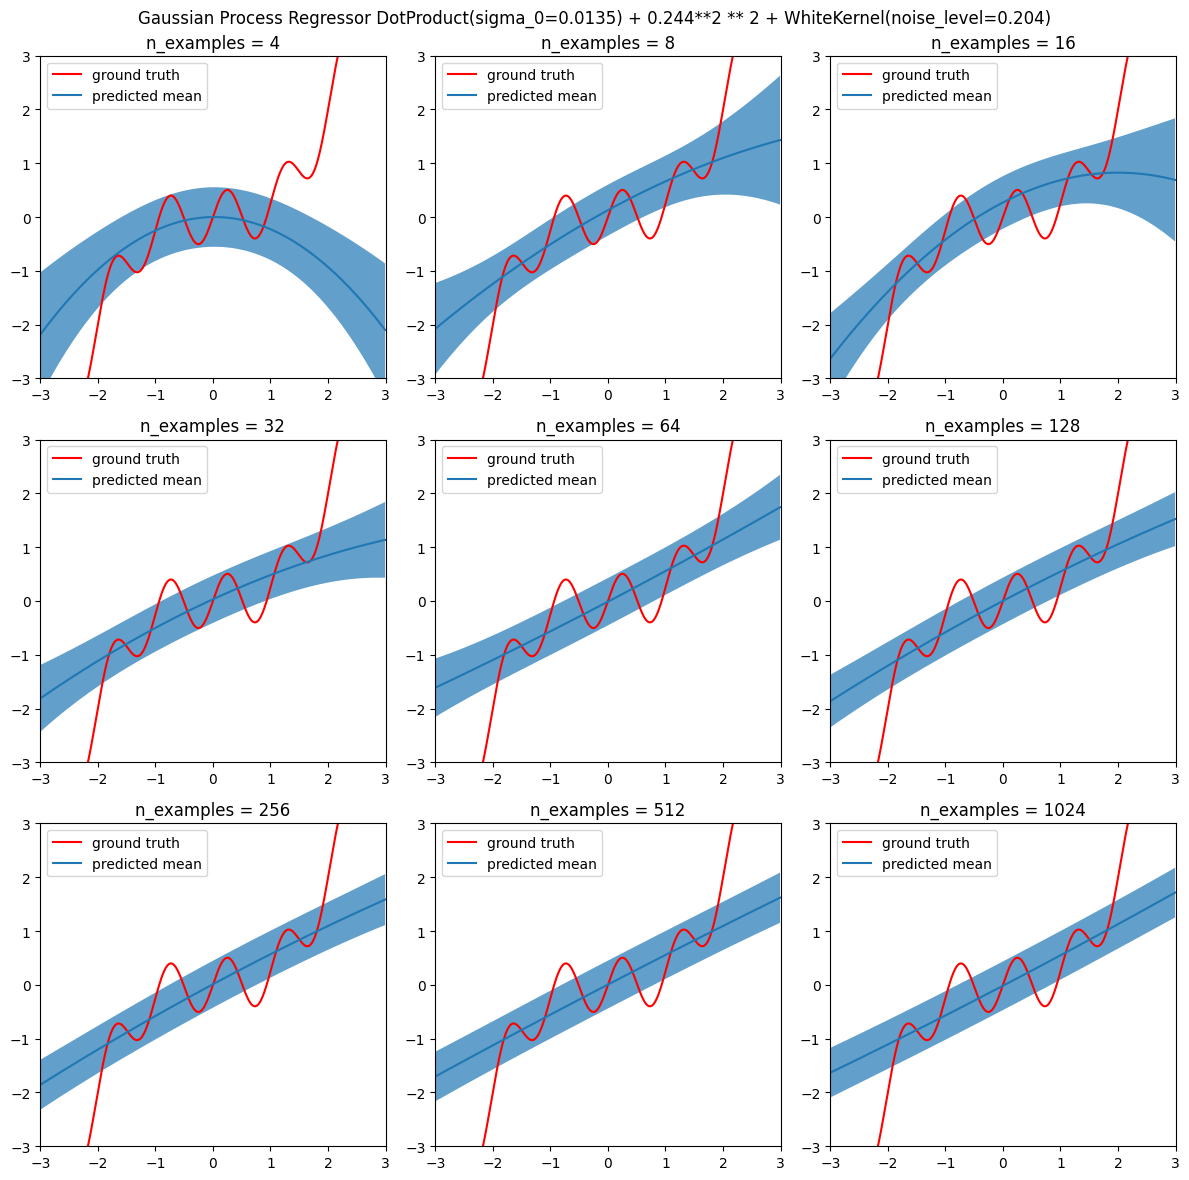

/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__kernel__k1__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__kernel__k2__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__kernel__k2__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


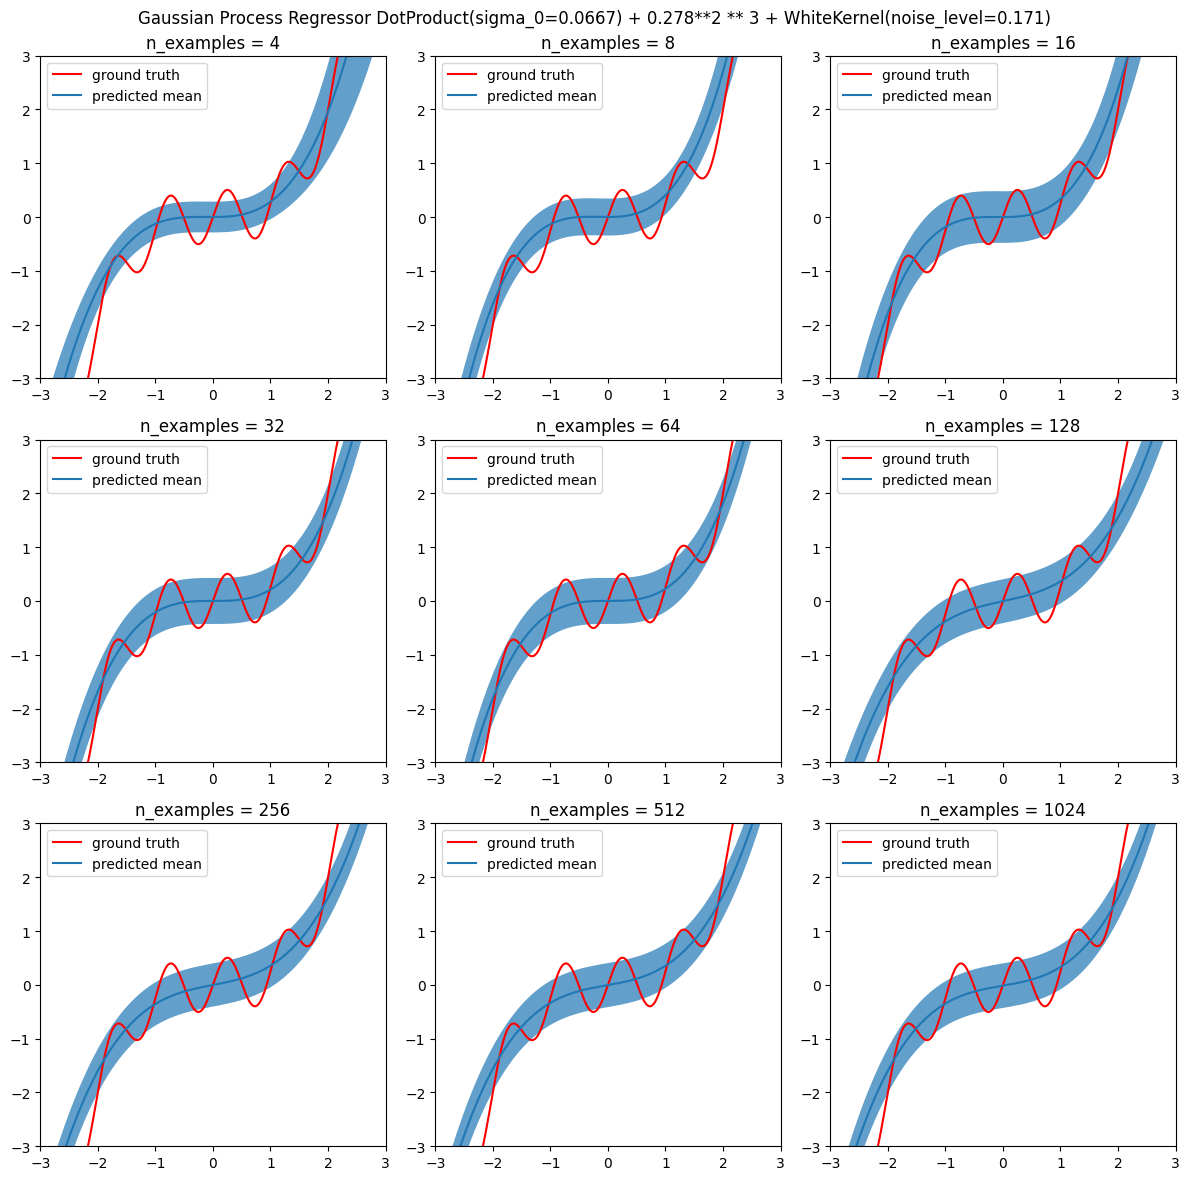

/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


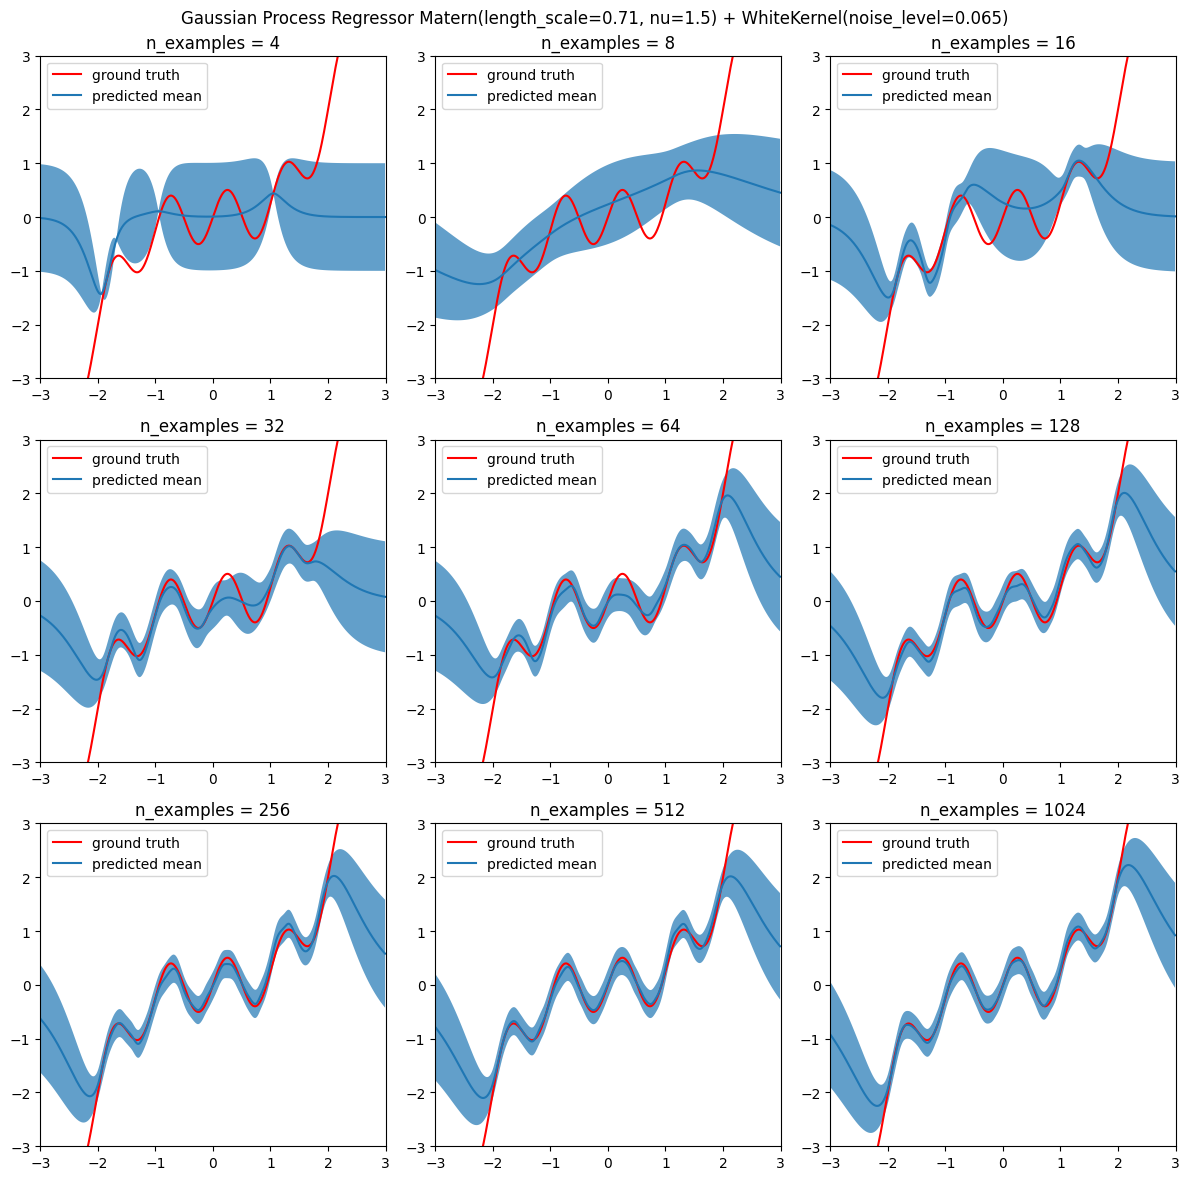

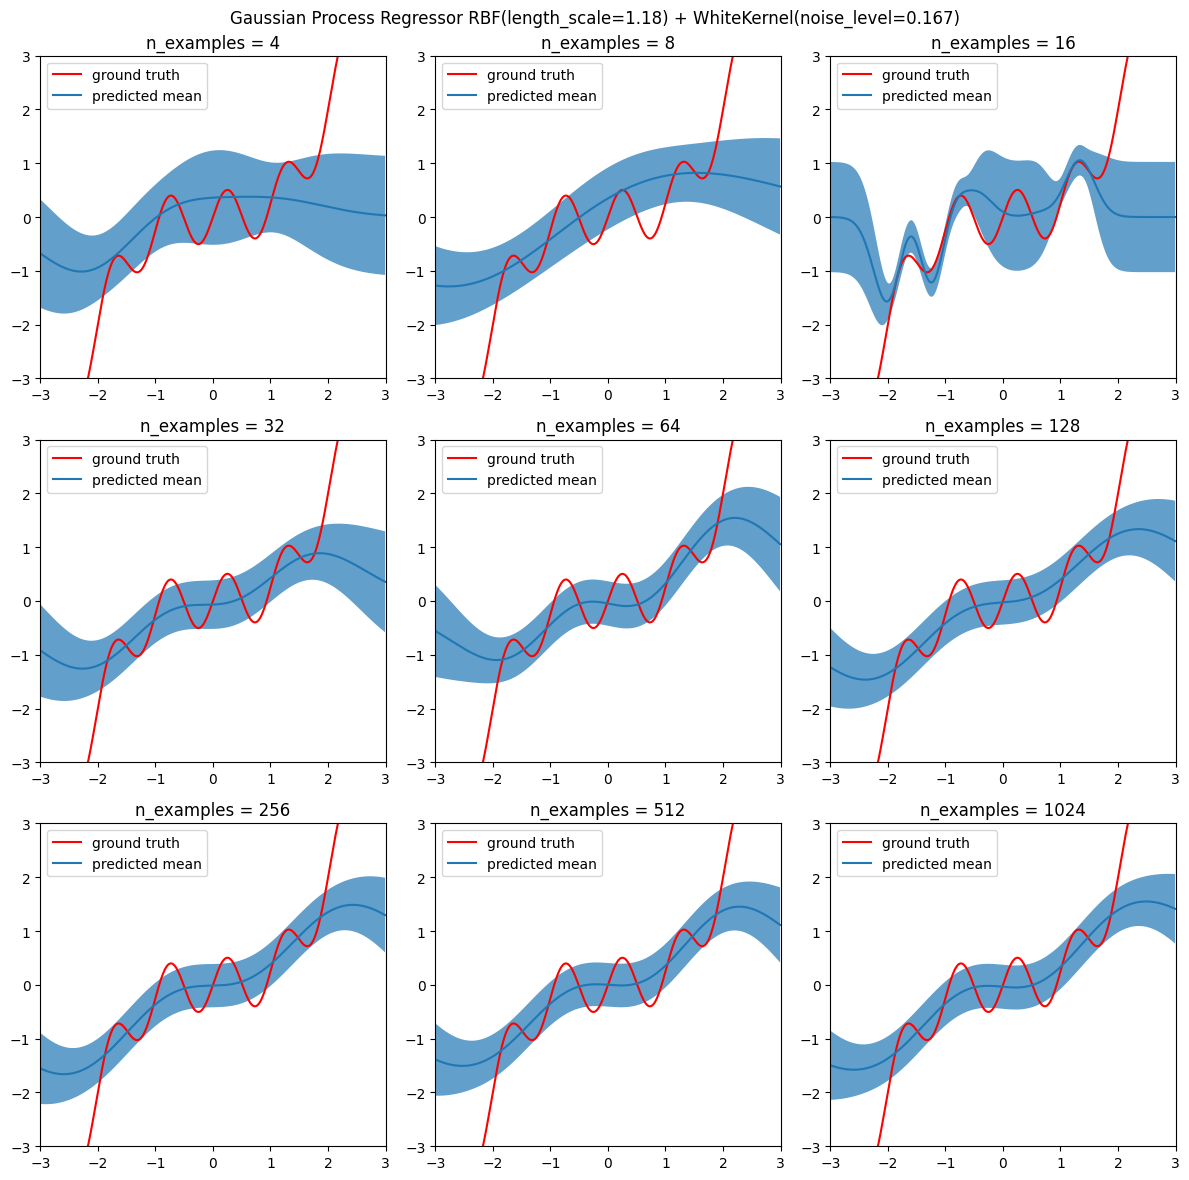

/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__kernel__k2__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__kernel__k2__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__kernel__k2__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/skl

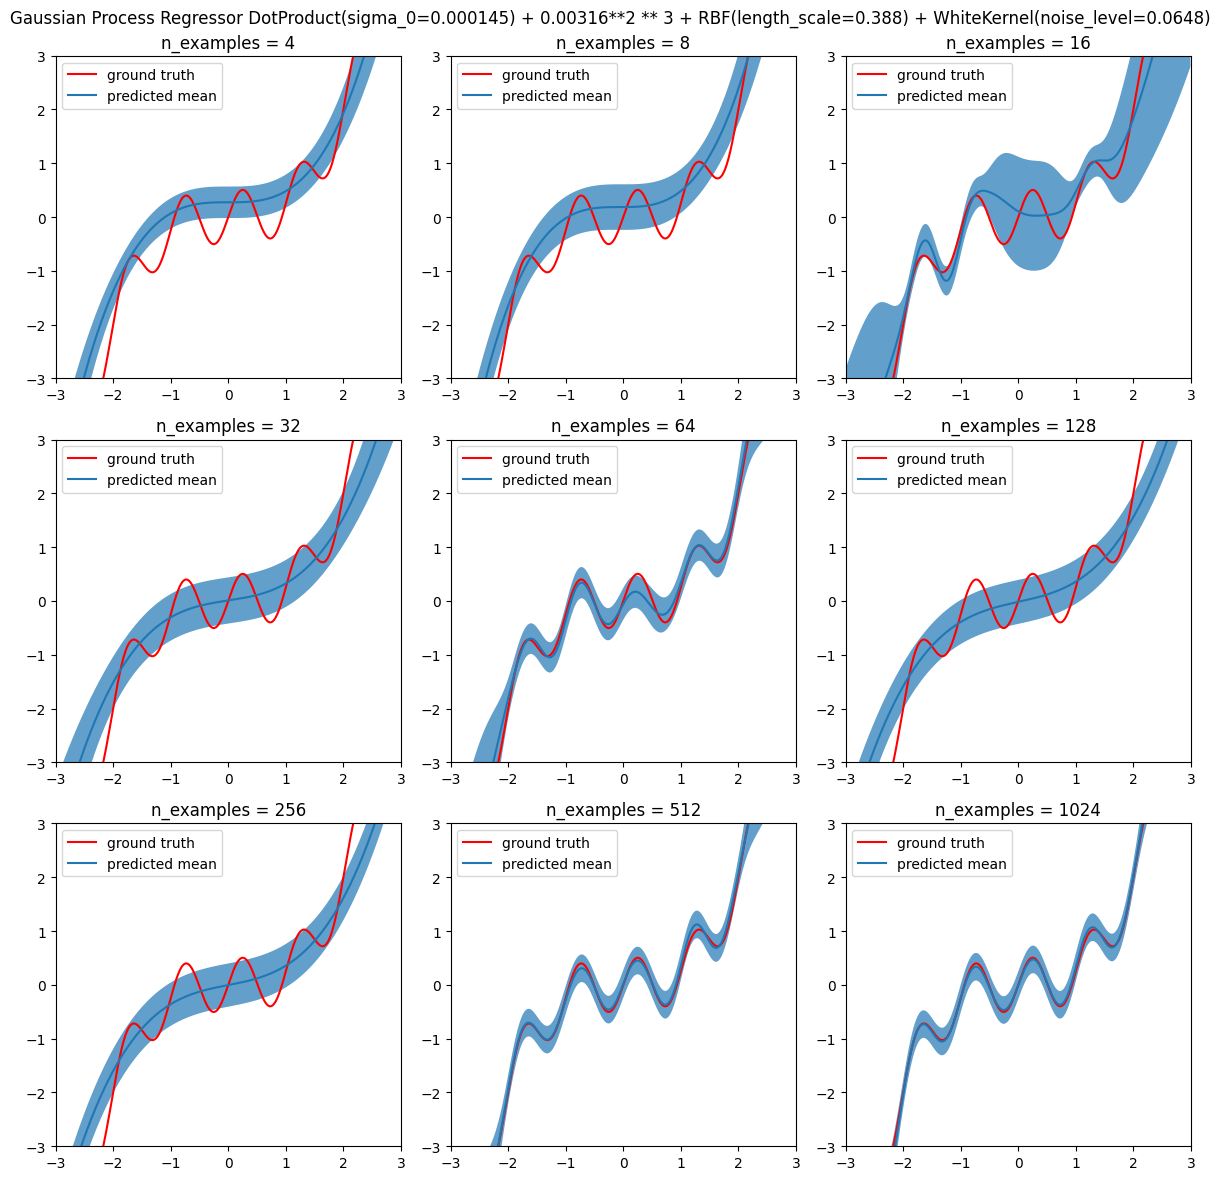

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

for kernel in kernels:
  create_subplot(kernel)

**a) the behavoir of the regressors as the number of examples used to estimate the regressors increase**

Across all regressors, increasing the number of examples used during training appears to improve the model's performance (within the domain of x-values [-3,3]).

**b) the extrapolation (the estimated curve outside the region of the data) behavior of the regressors**

For regressors with a polynomial kernel, the curve broadly has the same end-limit behaviour as a polynomial curve of the same order. E.g. the first regressor (in the above code-block output) with a polynomial kernel of order two appeared to follow the same "inverted u" shape as an inverted x^2 graph. Likewise, the second regressor (in the above code-block output) had a 3rd order polynomial kernel and exhbibited the same end-behaviour as a cubic polynomial. This is expected behaviour using a polynomial kernel.

It appears as though inclusion of either an RBF or Matern kernel will lead to stabilised levels in the extrapolated regions. Meaning the output of the model as x approaches negative or positive infinity is some finite value. For example, the Gaussian Process Regressor Matern(length_scale=0.71, nu=1.5) + WhiteKernel(noise_level=0.065) appears to output a constant value of 0 at each side of the x-axis limits.


**c) the ability for the regressor to "capture" the wriggly behaviour in the middle of the data**

It appears as though the combination of polynomial and white noise kernels cannot produce regressors than can reproduce the higher frequency ripples in the true plot (i.e. the "wriggly behaviour"). This is expected, as neither kernels can produce sample functions that could describe such behaviour mathematically.

Regressors with RBF kernels performed poorly with a low number of examples.

The regressors produced in Part A of this lab  - that have the default RBF kernel - appear to perform well in this area.


**d) the amount of estimated (white) noise epsilon**

The noise level of the WhiteKernel appears significant to a regressor's ability to capture the high-frequency ripples in the middle of the data. All above regressors whose kernel had a noise_level value above 0.167 were not able to capture the "wriggley" behaviour. Likewise, if the noise_level value was less than

###Bonus

/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k1__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.p

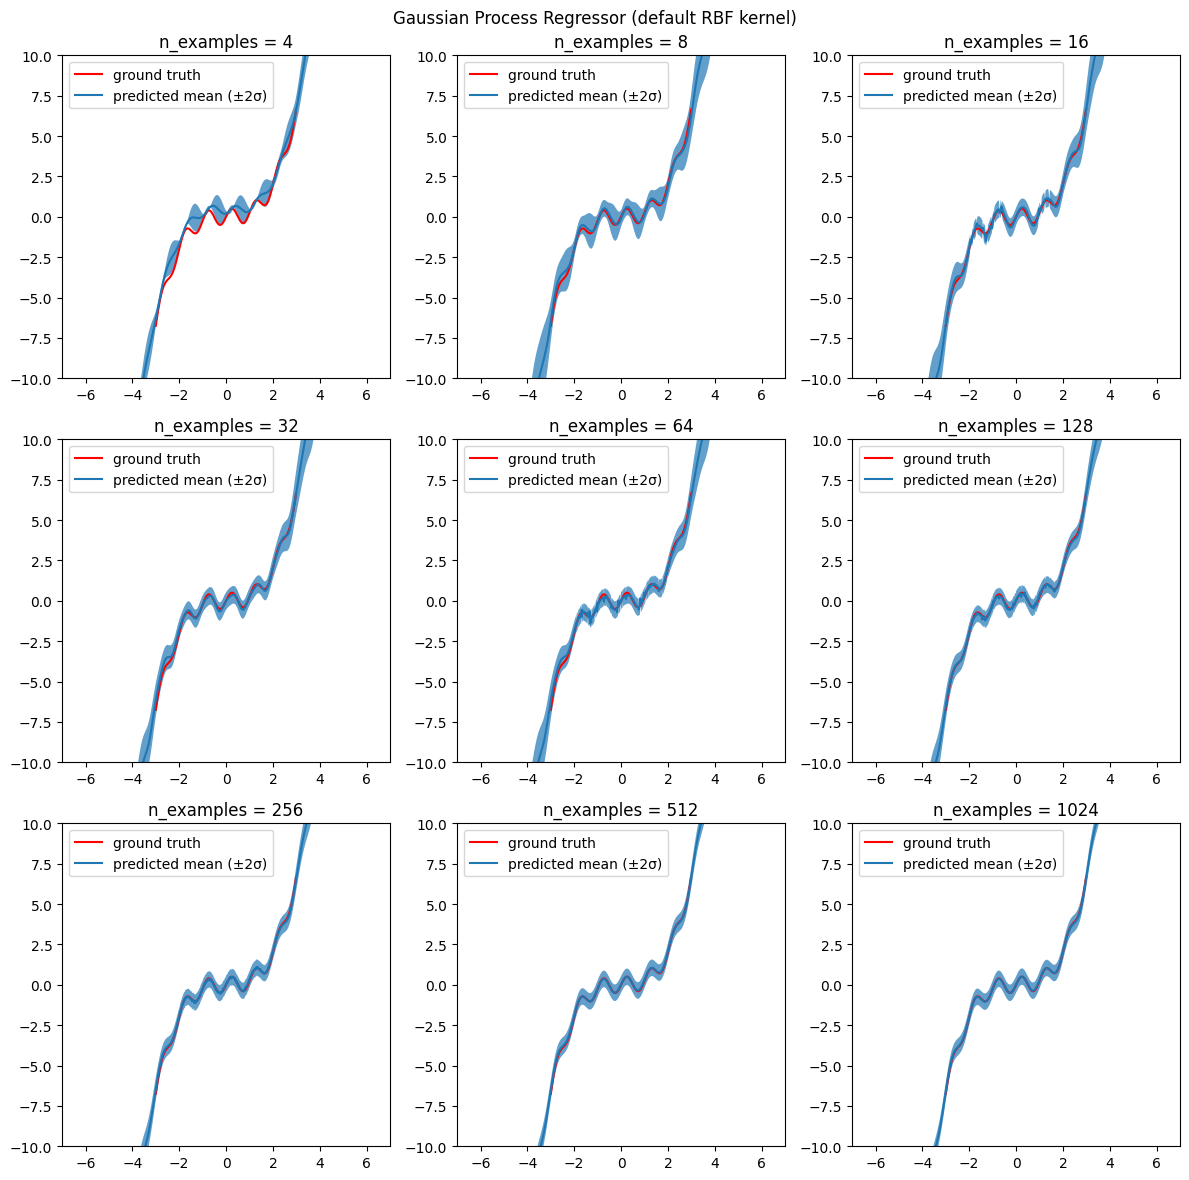

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.ExpSineSquared.html
# https://medium.com/data-science/gaussian-process-kernels-96bafb4dd63e
# https://www.cs.toronto.edu/~duvenaud/cookbook/
# https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_co2.html#sphx-glr-auto-examples-gaussian-process-plot-gpr-co2-py
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import RationalQuadratic

# in theory, we would want to combine a polynomial kernel of degree 3 with some periodic kernel, such that the oscillatory and cubic behaviour of
# the synthetic data can be modelled by the regressor.

periodic_kernel = ExpSineSquared(length_scale = 1, periodicity=1, periodicity_bounds="fixed")
polynomial_kernel = Exponentiation(DotProduct(),3)
noise_kernel = 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(
    noise_level=0.1**2, noise_level_bounds=(1e-5, 1e5)
)
irregularities_kernel = 0.5**2 * RationalQuadratic(length_scale=1.0, alpha=1.0)

kernel = periodic_kernel + polynomial_kernel + irregularities_kernel + noise_kernel

# examples
n_examples = [4,8,16,32,64,128,256,512,1024]

# Creating subplots
fig, ax = plt.subplots(3, 3, figsize=(12,12))
i = 0;

# for each subplot
for row in range(3):
  for col in range(3):
    data_X,data_y = data_generator(n_examples[i], SEED)

    # create regressor
    gp = GaussianProcessRegressor(kernel=kernel)

    # fit to data
    gp.fit(data_X,data_y)

    # generate range of x values and use to produce mean predictions
    xg = [x/100 for x in range(-300,300,1)]
    xg = np.array(xg)
    xg = xg.reshape(-1, 1)
    yg = [ground_truth_concept(x) for x in xg]

    # generate mean prediction values
    xg2 = [x/100 for x in range(-400,400,1)]
    xg2 = np.array(xg2)
    xg2 = xg2.reshape(-1, 1)
    y_mean, std = gp.predict(xg2, return_std=True)

    # create plot
    ax[row,col].plot(xg, yg, c='r', label='ground truth')
    ax[row,col].plot(xg2, y_mean, label='predicted mean (±2σ)')
    ax[row,col].fill_between(xg2.flatten(), np.add(y_mean,-2*std), np.add(y_mean,2*std), alpha=0.7)
    ax[row,col].title.set_text(f"n_examples = {n_examples[i]}")

    i += 1

# Adding legends and showing the figure
plt.suptitle("Gaussian Process Regressor (default RBF kernel)")
for axes in ax.flat:
    axes.legend()
    axes.set_xlim(-7, 7)
    axes.set_ylim(-10, 10)
plt.tight_layout()
plt.show()

###Convert to PDF

In [ ]:
!sudo apt-get update
!sudo apt-get install pandoc texlive-xetex texlive-fonts-recommended texlive-plain-generic -y
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/Lab8-MatthewChristensen-1631625.ipynb"

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [81.0 kB]
Hit:4 https://cli.github.com/packages stable InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,307 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:14 http://security